In [27]:
%pip install geojson shapely cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Aisne
Aube
Calvados
Cantal
Eure-et-Loir
Ille-et-Vilaine
Jura
Landes
Loire
Loiret
Lot-et-Garonne
Meuse
Orne
Pas-de-Calais
Puy-de-Dôme
Bas-Rhin
Haut-Rhin
Seine-Maritime
Yonne
Seine-Saint-Denis
Alpes-de-Haute-Provence
Hautes-Alpes
Ardèche
Ardennes
Ariège
Charente-Maritime
Corrèze
Dordogne
Eure
Indre-et-Loire
Lozère
Nièvre
Oise
Pyrénées-Atlantiques
Rhône
Saône-et-Loire
Paris
Yvelines
Tarn
Tarn-et-Garonne
Var
Vendée
Haute-Vienne
Vosges
Hauts-de-Seine
Allier
Alpes-Maritimes
Aude
Corse-du-Sud
Côtes-d'Armor
Creuse
Doubs
Finistère
Gard
Gironde
Indre
Isère
Marne
Haute-Marne
Moselle
Hautes-Pyrénées
Pyrénées-Orientales
Savoie
Haute-Savoie
Seine-et-Marne
Vaucluse
Vienne
Val-de-Marne
Ain
Aveyron
Bouches-du-Rhône
Charente
Cher
Haute-Corse
Côte-d'Or
Drôme
Haute-Garonne
Gers
Hérault
Haute-Loire
Loire-Atlantique
Lot
Maine-et-Loire
Manche
Morbihan
Nord
Haute-Saône
Sarthe
Somme
Essonne
Val-d'Oise
Loir-et-Cher
Mayenne
Meurthe-et-Moselle
Deux-Sèvres
Territoire de Belfort


100%|██████████| 96/96 [00:00<00:00, 3009.82it/s]


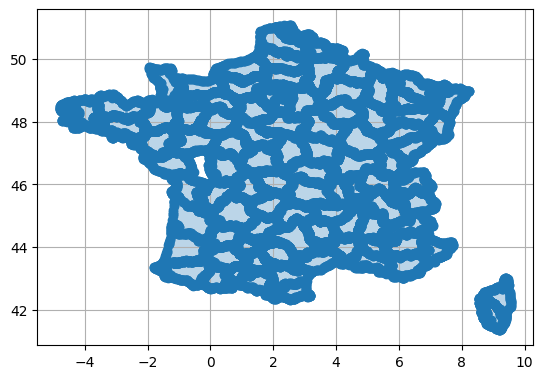

In [14]:
import geojson
from tqdm import tqdm
import shapely
from shapely.geometry import Polygon, MultiPolygon, Point
import shapely.plotting
filename = "../../data/geo/departements.geojson"
polys = geojson.load(open(filename))
for feature in polys["features"]:
    print(feature["properties"]["nom"])

names_to_keep = [
"Aisne",
"Aube",
"Calvados",
"Cantal",
"Eure-et-Loir",
"Ille-et-Vilaine",
"Jura",
"Landes",
"Loire",
"Loiret",
"Lot-et-Garonne",
"Meuse",
"Orne",
"Pas-de-Calais",
"Puy-de-Dôme",
"Bas-Rhin",
"Haut-Rhin",
"Seine-Maritime",
"Yonne",
"Seine-Saint-Denis",
"Alpes-de-Haute-Provence",
"Hautes-Alpes",
"Ardèche",
"Ardennes",
"Ariège",
"Charente-Maritime",
"Corrèze",
"Dordogne",
"Eure",
"Indre-et-Loire",
"Lozère",
"Nièvre",
"Oise",
"Pyrénées-Atlantiques",
"Rhône",
"Saône-et-Loire",
"Paris",
"Yvelines",
"Tarn",
"Tarn-et-Garonne",
"Var",
"Vendée",
"Haute-Vienne",
"Vosges",
"Hauts-de-Seine",
"Allier",
"Alpes-Maritimes",
"Aude",
"Corse-du-Sud",
"Côtes-d'Armor",
"Creuse",
"Doubs",
"Finistère",
"Gard",
"Gironde",
"Indre",
"Isère",
"Marne",
"Haute-Marne",
"Moselle",
"Hautes-Pyrénées",
"Pyrénées-Orientales",
"Savoie",
"Haute-Savoie",
"Seine-et-Marne",
"Vaucluse",
"Vienne",
"Val-de-Marne",
"Ain",
"Aveyron",
"Bouches-du-Rhône",
"Charente",
"Cher",
"Haute-Corse",
"Côte-d'Or",
"Drôme",
"Haute-Garonne",
"Gers",
"Hérault",
"Haute-Loire",
"Loire-Atlantique",
"Lot",
"Maine-et-Loire",
"Manche",
"Morbihan",
"Nord",
"Haute-Saône",
"Sarthe",
"Somme",
"Essonne",
"Val-d'Oise",
"Loir-et-Cher",
"Mayenne",
"Meurthe-et-Moselle",
# "Deux-Sèvres",
# "Territoire de Belfort",
]

polys_region = {}
for feature in tqdm(polys["features"]):
    name = feature["properties"]["nom"]
    if name not in names_to_keep:
        continue
    if feature["geometry"]["type"] == "Polygon":
        polys_region[name] = Polygon(feature["geometry"]["coordinates"][0])
    elif feature["geometry"]["type"] == "MultiPolygon":
        # keeping the largest polygon
        tmp_list = [Polygon(geo[0]) for geo in feature["geometry"]["coordinates"]]
        largest = max(tmp_list, key=lambda x: x.area)
        polys_region[name] = Polygon(largest)


all_polys = [poly for poly in polys_region.values()]
# unpack the lists
maxi_multi_poly = MultiPolygon(all_polys)
for poly in maxi_multi_poly.geoms:
    shapely.plotting.plot_polygon(poly)

In [15]:
import numpy as np
import xarray as xr

In [16]:
filename_sun_d1 = "../../data/silver/weather_forecasts/temperature_hourly_d1.nc"

In [17]:
def which_region(lon, lat, polygons_regions: dict[MultiPolygon]):
    for i, (name, poly) in enumerate(polygons_regions.items()):
        if poly.contains(Point(lon, lat)):
            return i
    else:
        return np.nan


In [18]:
da = xr.open_dataset(filename_sun_d1).temperature

In [20]:
mask = xr.apply_ufunc(
    which_region,
    da.longitude,
    da.latitude,
    kwargs={"polygons_regions": polys_region},
    vectorize=True,
    dask="parallelized",
)

mask.name = "departement"
mask

<xarray.DataArray 'departement' (longitude: 143, latitude: 97)> Size: 111kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float64 1kB -4.7 -4.6 -4.5 -4.4 ... 9.2 9.3 9.4 9.5
  * latitude   (latitude) float64 776B 51.0 50.9 50.8 50.7 ... 41.6 41.5 41.4

In [21]:
mask.to_netcdf("../../data/geo/mask_france_departements.nc")

In [23]:
import yaml
with open("../../data/geo/departements_name.yaml", "w") as f:
    yaml.dump(list(polys_region.keys()), f)

In [25]:
print("departements = [")
for i, (name, poly) in enumerate(polys_region.items()):
    print("\"", name, "\",")
print("]")

departements = [
" Aisne ",
" Aube ",
" Calvados ",
" Cantal ",
" Eure-et-Loir ",
" Ille-et-Vilaine ",
" Jura ",
" Landes ",
" Loire ",
" Loiret ",
" Lot-et-Garonne ",
" Meuse ",
" Orne ",
" Pas-de-Calais ",
" Puy-de-Dôme ",
" Bas-Rhin ",
" Haut-Rhin ",
" Seine-Maritime ",
" Yonne ",
" Seine-Saint-Denis ",
" Alpes-de-Haute-Provence ",
" Hautes-Alpes ",
" Ardèche ",
" Ardennes ",
" Ariège ",
" Charente-Maritime ",
" Corrèze ",
" Dordogne ",
" Eure ",
" Indre-et-Loire ",
" Lozère ",
" Nièvre ",
" Oise ",
" Pyrénées-Atlantiques ",
" Rhône ",
" Saône-et-Loire ",
" Paris ",
" Yvelines ",
" Tarn ",
" Tarn-et-Garonne ",
" Var ",
" Vendée ",
" Haute-Vienne ",
" Vosges ",
" Hauts-de-Seine ",
" Allier ",
" Alpes-Maritimes ",
" Aude ",
" Corse-du-Sud ",
" Côtes-d'Armor ",
" Creuse ",
" Doubs ",
" Finistère ",
" Gard ",
" Gironde ",
" Indre ",
" Isère ",
" Marne ",
" Haute-Marne ",
" Moselle ",
" Hautes-Pyrénées ",
" Pyrénées-Orientales ",
" Savoie ",
" Haute-Savoie ",
" Seine-et-Marne ",
" Vauclu

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

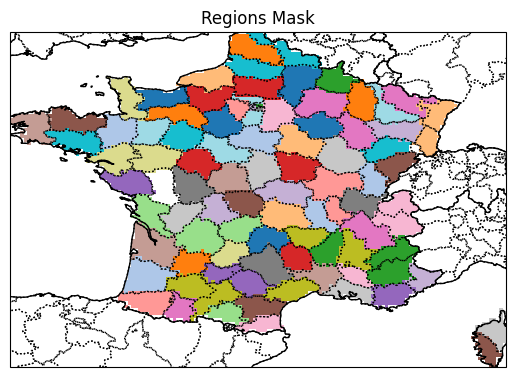

In [8]:
def show_mask(m):
    fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
    im = ax.imshow(
        m.T,
        origin="upper",
        transform=ccrs.PlateCarree(),
        extent=[
            m.longitude.min(),
            m.longitude.max(),
            m.latitude.min(),
            m.latitude.max(),
        ],
        cmap="tab20",
    )
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, linestyle=":")
    ax.set_title("Regions Mask")
    # add a fake legend with the regions
    pacht_list = []
    for i, (name, poly) in enumerate(polys_region.items()):
        color = im.cmap(im.norm(i))
        p = plt.Rectangle((0, 0), 1, 1, fc=color)
        pacht_list.append(p)
    # ax.legend(pacht_list, polys_region.keys(), loc="upper left", bbox_to_anchor=(1, 1))


show_mask(mask)

In [26]:
values, counts = np.unique(mask, return_counts=True)
len(values)

94

In [27]:
len(polys_region)

94

In [28]:
dep_means = da.groupby(mask).mean()

In [29]:
dep_means["group"] = [v for i, v in enumerate(polys_region.keys()) if i in dep_means.group]
dep_means = dep_means.rename({"group": "departement"})
dep_means

AttributeError: 'DataArray' object has no attribute 'group'

In [13]:
for i, val in enumerate(list(polys_region.keys())):
    if i not in dep_means["group"]:
        print(val)
        print(i)

KeyError: 'group'

In [30]:
dep_means.to_dask_dataframe().to_csv("../../data/silver/weather_forecasts/temperature_hourly_d1_departements.csv", single_file=True)

/home/antoine/.local/share/hatch/env/virtual/energy-forecast/Jk97fpOc/serve/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


['/home/antoine/code/energetic-stress-production/data/silver/weather_forecasts/temperature_hourly_d1_departements.csv']